In [ ]:
# Trevor's code
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy import constants as const
import poppy

w_0_lenslet = .12 * u.cm 
ff = 500*u.GHz
ll = const.c/ff

wf = poppy.FresnelWavefront(beam_radius=w_0_lenslet, wavelength=ll)

lenslet_aperture = poppy.GaussianAperture(fwhm=w_0_lenslet)
wf *= lenslet_aperture
wf.display()

Finding FWHM:
\begin{equation}
   1/2=e^{-kr^2}
\end{equation}

$$r=\sqrt(-\ln(1/2)/k)=\sqrt(\ln(2)/k)$$

Output of the lens is a gaussian that's down 15dB at $r_0=3in$:

$$ 10*log10[e^{-2kr_0^2}]=-15 $$

$$k=297.4178 m^{-2}$$


(2048, 2048)


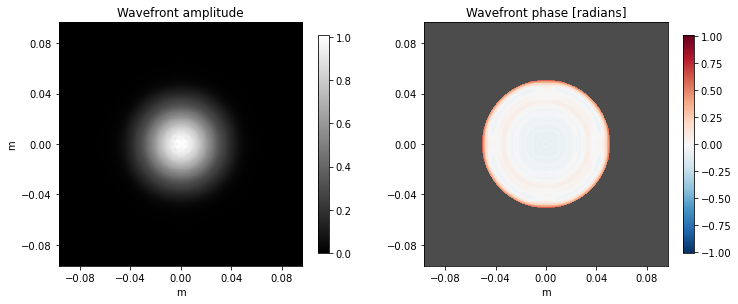

MemoryError: Unable to allocate 128. MiB for an array with shape (4190209, 4) and data type float64

<Figure size 432x288 with 2 Axes>

In [15]:
# Just one baffle at the top
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy import constants as const
import poppy


fwhm_ = np.sqrt(np.log(2)/297.4178) * u.m 
ff = 500*u.GHz
ll = const.c/ff

wf = poppy.FresnelWavefront(beam_radius=fwhm_, wavelength=ll)

lenslet_aperture = poppy.GaussianAperture(fwhm=fwhm_)
wf *= lenslet_aperture

ring = poppy.CircularAperture(radius=0.05*u.m)
wf *= ring

wf.propagate_fresnel(18.9238*u.cm)

wf *= ring

wf.propagate_fresnel(14.1455*u.cm)

plt.figure(figsize=(12,5))
wf.display('both', colorbar=True)
#print(wf.param_str)

y, x = wf.coordinates()
z = wf.intensity
print(z.shape)

a=0 #Toggles zoom
b=2048-a
fig, ax = plt.subplots()
c=ax.pcolormesh(x[a:b,a:b],y[a:b,a:b],z[a:b,a:b])
fig.colorbar(c,ax=ax)
plt.show()

w_0:4.828e-02 m, z_w0=0.000e+00 m
z=3.307e-01 m, z_r=1.221e-08 GHz m s
(2048, 2048)


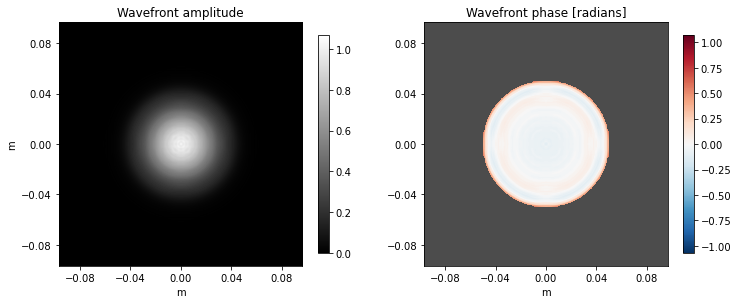

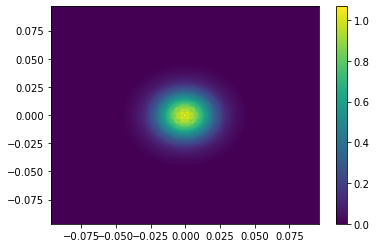

In [2]:
# 5 equally spaced baffles
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy import constants as const
import poppy


fwhm_ = np.sqrt(np.log(2)/297.4178) * u.m 
ff = 500*u.GHz
ll = const.c/ff

wf = poppy.FresnelWavefront(beam_radius=fwhm_, wavelength=ll)

lenslet_aperture = poppy.GaussianAperture(fwhm=fwhm_)
wf *= lenslet_aperture

ring = poppy.CircularAperture(radius=0.05*u.m)
wf *= ring

wf.propagate_fresnel(8.9238*u.cm)

#5 rings 2 cm apart
for dummyvar in np.arange(0,5):
    wf.propagate_fresnel(2*u.cm)
    wf *= ring

wf.propagate_fresnel(14.1455*u.cm)

plt.figure(figsize=(12,5))
wf.display('both', colorbar=True)
#print(wf.param_str)

y, x = wf.coordinates()
z2 = wf.intensity
print(z.shape)

a=0 # Toggles zoom
b=2048-a
fig, ax = plt.subplots()
c=ax.pcolormesh(x[a:b,a:b],y[a:b,a:b],z2[a:b,a:b])
fig.colorbar(c,ax=ax)
plt.show()

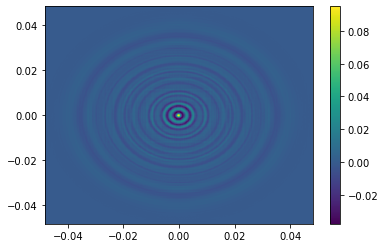

-27.830917786435926


In [16]:
# Effect of first 4 baffles
z3=z2-z
a=512 # Toggles zoom
b=2048-a
fig, ax = plt.subplots()
c=ax.pcolormesh(x[a:b,a:b],y[a:b,a:b],z3[a:b,a:b])
fig.colorbar(c,ax=ax)
plt.show()

delta=0
for m in np.arange(0,2048,dtype=int):
    for n in np.arange(0,2048,dtype=int):
        if (0.05)**2 < x[m,n]**2 + y[m,n]**2 :
            delta += z3[m,n]
print('Change in net power outside beam after adding 4 baffles:')            
print(delta)

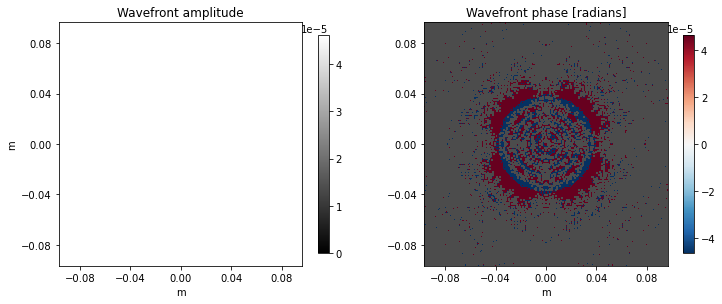

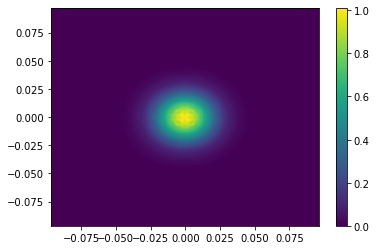

In [2]:
# One baffle at the top including reflection
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy import constants as const
import poppy

fwhm_ = np.sqrt(np.log(2)/297.4178) * u.m 
ff = 500*u.GHz
ll = const.c/ff

wf = poppy.FresnelWavefront(beam_radius=fwhm_, wavelength=ll)

lenslet_aperture = poppy.GaussianAperture(fwhm=fwhm_)
wf *= lenslet_aperture

ring = poppy.CircularAperture(radius=0.05*u.m)
wf *= ring

wf.propagate_fresnel(18.9238*u.cm)

wfr=wf # define reflected wavefront
wf *= ring

wf.propagate_fresnel(14.1455*u.cm)
y, x = wf.coordinates()
main = wf.intensity
main_phase = wf.phase
#wf is done now to handle the refelcted beam

reflection=poppy.SecondaryObscuration(secondary_radius = 0.05*u.m) #by superposition, reflection of baffle is equivalent to passing through this

wfr *= reflection
wfr.propagate_fresnel(18.9238*u.cm)

wfr *= reflection
wfr.propagate_fresnel(18.9238*u.cm)

wfr *= ring

wfr.propagate_fresnel(14.1455*u.cm) #wfr is done

plt.figure(figsize=(12,5))
wfr.display('both', colorbar=True)
#print(wf.param_str)

pr=0.2 #percent reflection

reflected = wfr.intensity*(pr)**2
reflected_phase = wfr.phase

#adjust reflected so it adds coherently
for m in np.arange(0,2048,dtype=int):
    for n in np.arange(0,2048,dtype=int):
        reflected[m,n]=reflected[m,n]*np.cos(reflected_phase[m,n]-main_phase[m,n])

total=main+reflected
a=0 #Toggles zoom
b=2048-a
fig, ax = plt.subplots()
c=ax.pcolormesh(x[a:b,a:b],y[a:b,a:b],total[a:b,a:b])
fig.colorbar(c,ax=ax)
plt.show()

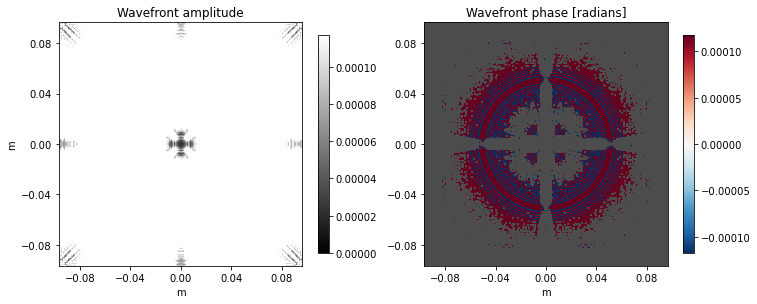

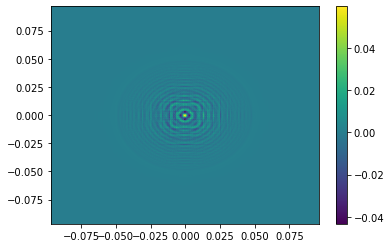

In [1]:
# Sanity check on reflection method
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy import constants as const
import poppy

fwhm_ = np.sqrt(np.log(2)/297.4178) * u.m 
ff = 500*u.GHz
ll = const.c/ff

wf = poppy.FresnelWavefront(beam_radius=fwhm_, wavelength=ll)

lenslet_aperture = poppy.GaussianAperture(fwhm=fwhm_)
wf *= lenslet_aperture

ring = poppy.CircularAperture(radius=0.05*u.m)
wf *= ring

wf1=wf # unimpeded wavefront
wf.propagate_fresnel(18.9238*u.cm)
wf1.propagate_fresnel(19.9238*u.cm)
template = wf1.intensity
template_phase = wf1.phase

wf2=wf # wavefront that sees coronagraph
wf *= ring # wf sees a circular aperature

wf.propagate_fresnel(1*u.cm)
y, x = wf.coordinates()
circ = wf.intensity
circ_phase = wf.phase

reflection=poppy.SecondaryObscuration(secondary_radius = 0.05*u.m) #by superposition, reflection of baffle is equivalent to passing through this

wf2 *= reflection
wf2.propagate_fresnel(1*u.cm)
corona = wf2.intensity
corona_phase = wf.phase

plt.figure(figsize=(12,5))
wf1.display('both', colorbar=True)

#adjust reflected so it adds coherently
for m in np.arange(0,2048,dtype=int):
    for n in np.arange(0,2048,dtype=int):
        corona[m,n]=corona[m,n]*np.cos(corona_phase[m,n]-circ_phase[m,n])

rebuilt=circ+corona
residual=template-rebuilt
a=0 #Toggles zoom
b=2048-a
fig, ax = plt.subplots()
c=ax.pcolormesh(x[a:b,a:b],y[a:b,a:b],residual[a:b,a:b])
fig.colorbar(c,ax=ax)
plt.show()

In [2]:
import numpy as np
x=np.sqrt(np.log(2)/297.4178)
print(x)

0.04827577473469725
